1. YOLO object detection
2. mediapipe human detection
3. 3D pose estimation 
카메라 좌표계를 기준으로 찾자 정규화한 값으로다가 mediapipe와 동일하게끔?
z 값은 상대적 값이라고 한다.


In [1]:
import numpy as np 
import os
os.environ["MKL_THREADING_LAYER"] = "GNU"
os.environ['CUDA_VISIBLE_DEVICES'] = '0, 1, 2, 3'

%matplotlib inline
import matplotlib.pyplot as plt

import cv2
import json
import math
from PIL import Image
from ultralytics import YOLO

In [2]:
# import os
# import json

# def convert_simple_json_to_yolo(json_file_path, output_dir, image_width, image_height, class_id=0):
#     """
#     단일 JSON 파일을 읽어 YOLO 형식의 .txt 파일로 변환하여 저장합니다.
#     (Reads a single JSON file and converts it to YOLO .txt format, then saves it.)
#     """
#     try:
#         with open(json_file_path, 'r', encoding='utf-8') as f:
#             json_data = json.load(f)
#     except Exception as e:
#         print(f"Error reading or parsing {json_file_path}: {e}")
#         return

#     # Construct the output file path, replacing .json with .txt
#     output_file_name = os.path.basename(json_file_path).replace('.json', '.txt')
#     output_file_path = os.path.join(output_dir, output_file_name)

#     with open(output_file_path, 'w') as f:
#         # Check if 'bounding_boxes' key exists and is not empty
#         if "bounding_boxes" not in json_data or not json_data["bounding_boxes"]:
#             print(f"No bounding boxes found in {json_file_path}. Skipping.")
#             return

#         for bbox in json_data["bounding_boxes"]:
#             # Unpack bounding box coordinates
#             x_min, y_min, x_max, y_max = bbox

#             # Ensure min <= max for coordinates
#             x_min, x_max = min(x_min, x_max), max(x_min, x_max)
#             y_min, y_max = min(y_min, y_max), max(y_min, y_max)

#             # Clamp coordinates to image boundaries
#             x_min = max(0, min(x_min, image_width))
#             y_min = max(0, min(y_min, image_height))
#             x_max = max(0, min(x_max, image_width))
#             y_max = max(0, min(y_max, image_height))

#             # Calculate YOLO format values: center_x, center_y, width, height (normalized)
#             center_x = (x_min + x_max) / 2 / image_width
#             center_y = (y_min + y_max) / 2 / image_height
#             width = (x_max - x_min) / image_width
#             height = (y_max - y_min) / image_height

#             # Skip if bounding box has zero or negative dimensions after clamping
#             if width <= 0 or height <= 0:
#                 print(f"Warning: Invalid bbox dimensions in {json_file_path}. Skipping this bounding box.")
#                 continue
            
#             # Write the YOLO formatted line to the output file
#             f.write(f"{class_id} {center_x:.6f} {center_y:.6f} {width:.6f} {height:.6f}\n")
#     print(f"Successfully converted {os.path.basename(json_file_path)} to YOLO format.")


# def process_all_jsons_in_directory(json_dir, output_dir, image_width, image_height, class_id=0):
#     """
#     주어진 디렉토리 내의 모든 JSON 파일을 YOLO 형식으로 변환합니다.
#     (Processes all JSON files within a given directory and converts them to YOLO format.)
#     """
#     # Create the output directory if it doesn't exist
#     os.makedirs(output_dir, exist_ok=True)
#     print(f"Processing JSON files from: {json_dir}")
#     print(f"Outputting YOLO files to: {output_dir}")

#     # Iterate through all files in the specified directory
#     for filename in os.listdir(json_dir):
#         # Check if the file is a JSON file
#         if filename.endswith('.json'):
#             json_file_path = os.path.join(json_dir, filename)
#             print(f"Converting {filename}...")
#             # Call the conversion function for each JSON file
#             convert_simple_json_to_yolo(json_file_path, output_dir, image_width, image_height, class_id)
#         else:
#             print(f"Skipping non-JSON file: {filename}")

# # --- Configuration ---
# json_dir_path = '/home/najo/NAS/Meca500_3D_Pose_Estimation/labels/label_250509/top'
# output_directory = '/home/najo/NAS/Meca500_3D_Pose_Estimation/vla_dataset_insertion_250514_total/Top/labels/train'
# image_width = 1920
# image_height = 1200
# class_id_for_all_objects = 0 # Default class ID for all detected objects

# # --- Run the conversion ---
# process_all_jsons_in_directory(json_dir_path, output_directory, image_width, image_height, class_id_for_all_objects)

# print("\nAll specified JSON files have been processed.")


In [2]:
model = YOLO("/home/najo/NAS/Meca500_3D_Pose_Estimation/yolo11x.pt")

# 학습 시작
model.train(
    val=True,
    data="/home/najo/NAS/Meca500_3D_Pose_Estimation/vla_dataset_insertion_250514_total/total_meca_yolo_train_box.yaml",  # 데이터셋 설정 파일 경로
    epochs=100,                  # 학습 에포크 수
    imgsz=1200,                  # 입력 이미지 크기
    batch=24,                   # 배치 크기
    name="custom_yolov11X",       # 실험 이름
    device="0, 1, 2, 3",          # 사용할 GPU 장치
    workers = 16,
    )


Ultralytics 8.3.33 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24135MiB)
                                                       CUDA:1 (NVIDIA GeForce RTX 3090, 24135MiB)
                                                       CUDA:2 (NVIDIA GeForce RTX 3090, 24135MiB)
                                                       CUDA:3 (NVIDIA GeForce RTX 3090, 24135MiB)
engine/trainer: task=detect, mode=train, model=/home/najo/NAS/Meca500_3D_Pose_Estimation/yolo11x.pt, data=/home/najo/NAS/Meca500_3D_Pose_Estimation/vla_dataset_insertion_250514_total/total_meca_yolo_train_box.yaml, epochs=100, time=None, patience=100, batch=24, imgsz=1200, save=True, save_period=-1, cache=False, device=0, 1, 2, 3, workers=16, project=None, name=custom_yolov11X, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scal

E0000 00:00:1750320846.316172 2271456 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750320846.320756 2271456 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750320846.334209 2271456 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750320846.334225 2271456 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750320846.334226 2271456 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750320846.334228 2271456 computation_placer.cc:177] computation placer already registered. Please check linka

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      2784  ultralytics.nn.modules.conv.Conv             [3, 96, 3, 2]                 
  1                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  2                  -1  2    389760  ultralytics.nn.modules.block.C3k2            [192, 384, 2, True, 0.25]     
  3                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
  4                  -1  2   1553664  ultralytics.nn.modules.block.C3k2            [384, 768, 2, True, 0.25]     
  5                  -1  1   5309952  ultralytics.nn.modules.conv.Conv             [768, 768, 3, 2]              
  6                  -1  2   5022720  ultralytics.nn.modules.block.C3k2            [768, 768, 2, True]           
  7                  -1  1   5309952  ultralytics

E0000 00:00:1750320857.711034 2271550 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750320857.716894 2271550 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750320857.732162 2271550 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750320857.732196 2271550 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750320857.732198 2271550 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750320857.732199 2271550 computation_placer.cc:177] computation placer already registered. Please check linka

TensorBoard: Start with 'tensorboard --logdir runs/detect/custom_yolov11X', view at http://localhost:6006/
Overriding model.yaml nc=80 with nc=1
Transferred 1009/1015 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
WARNING ⚠️ imgsz=[1200] must be multiple of max stride 32, updating to [1216]


train: Scanning /home/najo/NAS/Meca500_3D_Pose_Estimation/vla_dataset_insertion_250514_total/Front/labels/train.cache... 1964 images, 950 backgrounds, 0 corrupt: 100%|██████████| 2900/2900 [00:00<?, ?it/s]
/home/najo/.conda/envs/dip/lib/python3.10/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.0'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/home/najo/.conda/envs/dip/lib/python3.10/site-packages/ultralytics/data/augment.py:1850: UserWarning: Argument 'quality_lower' is not valid and will be ignored.
  A.ImageCompression(quality_lower=75, p=0.0),


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /home/najo/NAS/Meca500_3D_Pose_Estimation/vla_dataset_insertion_250514_total/Front/labels/val.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
/home/najo/.conda/envs/dip/lib/python3.10/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.0'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/home/najo/.conda/envs/dip/lib/python3.10/site-packages/ultralytics/data/augment.py:1850: UserWarning: Argument 'quality_lower' is not valid and will be ignored.
  A.ImageCompression(quality_lower=75, p=0.0),
/home/najo/.conda/envs/dip/lib/python3.10/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.0'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set

Plotting labels to runs/detect/custom_yolov11X/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005625000000000001), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1216 train, 1216 val
Using 48 dataloader workers
Logging results to runs/detect/custom_yolov11X
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      23.2G     0.8357      2.234       1.33          5       1216: 100%|██████████| 121/121 [01:19<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.49it/s]


                   all         40         40       0.41      0.643      0.477      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      22.7G     0.7211      1.002      1.186         11       1216: 100%|██████████| 121/121 [01:15<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]


                   all         40         40   0.000836      0.225    0.00108   0.000244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      22.9G     0.8294      1.032      1.218         12       1216: 100%|██████████| 121/121 [01:14<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]


                   all         40         40      0.722      0.375      0.383      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      22.7G     0.7112     0.8395      1.148          8       1216: 100%|██████████| 121/121 [01:13<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]


                   all         40         40      0.732        0.7      0.752      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      22.9G     0.6469     0.7498      1.102          4       1216: 100%|██████████| 121/121 [01:14<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]


                   all         40         40      0.916        0.6      0.763      0.675

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      22.8G     0.6224     0.7376      1.093          5       1216: 100%|██████████| 121/121 [01:14<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.01it/s]


                   all         40         40      0.764      0.875      0.855      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      22.7G     0.5714      0.653       1.04          6       1216: 100%|██████████| 121/121 [01:14<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]


                   all         40         40      0.963          1      0.982       0.87

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      22.9G     0.5689     0.6072      1.038         10       1216: 100%|██████████| 121/121 [01:14<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]


                   all         40         40      0.869      0.994      0.934      0.847

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      22.8G     0.5555     0.5849      1.051          8       1216: 100%|██████████| 121/121 [01:14<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.01it/s]


                   all         40         40      0.859          1      0.934      0.857

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      22.7G      0.497     0.5521     0.9812          4       1216: 100%|██████████| 121/121 [01:14<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]


                   all         40         40      0.993          1      0.995      0.915

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      22.9G     0.5129     0.5661      1.003          6       1216: 100%|██████████| 121/121 [01:14<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]


                   all         40         40      0.988          1      0.995       0.91

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      22.8G     0.5025      0.527      1.016          8       1216: 100%|██████████| 121/121 [01:14<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]


                   all         40         40       0.96          1      0.988      0.891

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      22.7G     0.5007     0.5307      1.014         13       1216: 100%|██████████| 121/121 [01:14<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]


                   all         40         40      0.994          1      0.995      0.925

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      22.9G     0.4789     0.5116      1.003          6       1216: 100%|██████████| 121/121 [01:14<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.61it/s]


                   all         40         40      0.962          1       0.99      0.918

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      22.8G     0.4627     0.5203     0.9855          6       1216: 100%|██████████| 121/121 [01:14<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]


                   all         40         40      0.965          1      0.989      0.915

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      22.7G     0.4534     0.4648     0.9901          4       1216: 100%|██████████| 121/121 [01:14<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]


                   all         40         40          1      0.934      0.987      0.931

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      22.9G     0.4577     0.4816     0.9833         12       1216: 100%|██████████| 121/121 [01:14<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]


                   all         40         40      0.976      0.999      0.994      0.934

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      22.8G      0.453      0.447     0.9722          7       1216: 100%|██████████| 121/121 [01:14<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]


                   all         40         40          1      0.983      0.995      0.928

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      22.7G     0.4495     0.4517     0.9877          7       1216: 100%|██████████| 121/121 [01:14<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.75it/s]


                   all         40         40          1      0.989      0.995       0.93

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      22.9G     0.4101     0.3693     0.9622         12       1216:   8%|▊         | 10/121 [00:06<01:07,  1.64it/s]W0619 17:39:33.626000 2271535 site-packages/torch/distributed/elastic/agent/server/api.py:704] Received Signals.SIGINT death signal, shutting down workers
W0619 17:39:33.629000 2271535 site-packages/torch/distributed/elastic/multiprocessing/api.py:897] Sending process 2271550 closing signal SIGINT
Process Process-15:
W0619 17:39:33.630000 2271535 site-packages/torch/distributed/elastic/multiprocessing/api.py:897] Sending process 2271551 closing signal SIGINT
W0619 17:39:33.631000 2271535 site-packages/torch/distributed/elastic/multiprocessing/api.py:897] Sending process 2271552 closing signal SIGINT
Process Process-9:
W0619 17:39:33.632000 2271535 site-packages/torch/distributed/elastic/multiprocessing/api.py:897] Sending process 2271553 closing signal SIGINT
Traceback (most recent call last):
  File "/home/najo/.conda/envs/dip/lib/python3.10/multiprocessing/pr

KeyboardInterrupt: 

In [4]:
def visualize_results(results, img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR로 로드되므로 RGB로 변환
    boxes = results[0].boxes
    print(boxes)
    for box in boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # 좌상단(x1, y1) 우하단(x2, y2)
        class_id = int(box.cls[0])
        conf = box.conf[0]  # 신뢰도
        
        class_name = model.names[class_id]

        color = (255, 0, 0)  # 빨간색
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

        label = f"{class_name} {conf:.2f}"
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    

In [ ]:
# import os
# import shutil
# from tqdm import tqdm

# # --- 설정 ---
# # 원본 폴더 (생성된 라벨들이 있는 곳)
# source_folder = "/home/najo/NAS/Meca500_3D_Pose_Estimation/vla_dataset_insertion_250514_total/Front/labels_generated"

# # 목적지 폴더 (옮길 곳)
# destination_folder = "/home/najo/NAS/Meca500_3D_Pose_Estimation/vla_dataset_insertion_250514_total/Front/labels/train"

# # --- 실행 ---
# # 목적지 폴더가 없으면 생성
# os.makedirs(destination_folder, exist_ok=True)

# # 소스 폴더의 모든 파일 목록을 가져옴
# files_to_move = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]

# if not files_to_move:
#     print(f"'{source_folder}'에 이동할 파일이 없습니다.")
# else:
#     print(f"총 {len(files_to_move)}개의 파일을 '{destination_folder}'로 이동합니다...")
    
#     # tqdm으로 진행 상황 표시하며 파일 이동
#     for filename in tqdm(files_to_move, desc="파일 이동 중"):
#         source_path = os.path.join(source_folder, filename)
#         destination_path = os.path.join(destination_folder, filename)
        
#         # 파일 이동
#         shutil.move(source_path, destination_path)
        
#     print("\n파일 이동이 완료되었습니다! ✅")

총 495개의 파일을 '/home/najo/NAS/Meca500_3D_Pose_Estimation/vla_dataset_insertion_250514_total/Front/labels/train'로 이동합니다...


파일 이동 중: 100%|██████████| 495/495 [00:00<00:00, 33115.04it/s]


파일 이동이 완료되었습니다! ✅



image 1/1 /home/najo/NAS/Meca500_3D_Pose_Estimation/vla_dataset_insertion_250514_total/Front/images/train/zed_41182735_right_1747200819.548.jpg: 768x1216 (no detections), 33.0ms
Speed: 6.9ms preprocess, 33.0ms inference, 0.5ms postprocess per image at shape (1, 3, 768, 1216)
zed_41182735_right_1747200819.548.jpg - 실행 시간: 0.6841초

image 1/1 /home/najo/NAS/Meca500_3D_Pose_Estimation/vla_dataset_insertion_250514_total/Front/images/train/zed_41182735_left_1747200995.661.jpg: 768x1216 1 Robot, 32.4ms
Speed: 6.9ms preprocess, 32.4ms inference, 1.2ms postprocess per image at shape (1, 3, 768, 1216)
zed_41182735_left_1747200995.661.jpg - 실행 시간: 0.0563초

image 1/1 /home/najo/NAS/Meca500_3D_Pose_Estimation/vla_dataset_insertion_250514_total/Front/images/train/zed_41182735_right_1747201075.201.jpg: 768x1216 1 Robot, 32.5ms
Speed: 7.0ms preprocess, 32.5ms inference, 1.1ms postprocess per image at shape (1, 3, 768, 1216)
zed_41182735_right_1747201075.201.jpg - 실행 시간: 0.0563초

image 1/1 /home/najo/

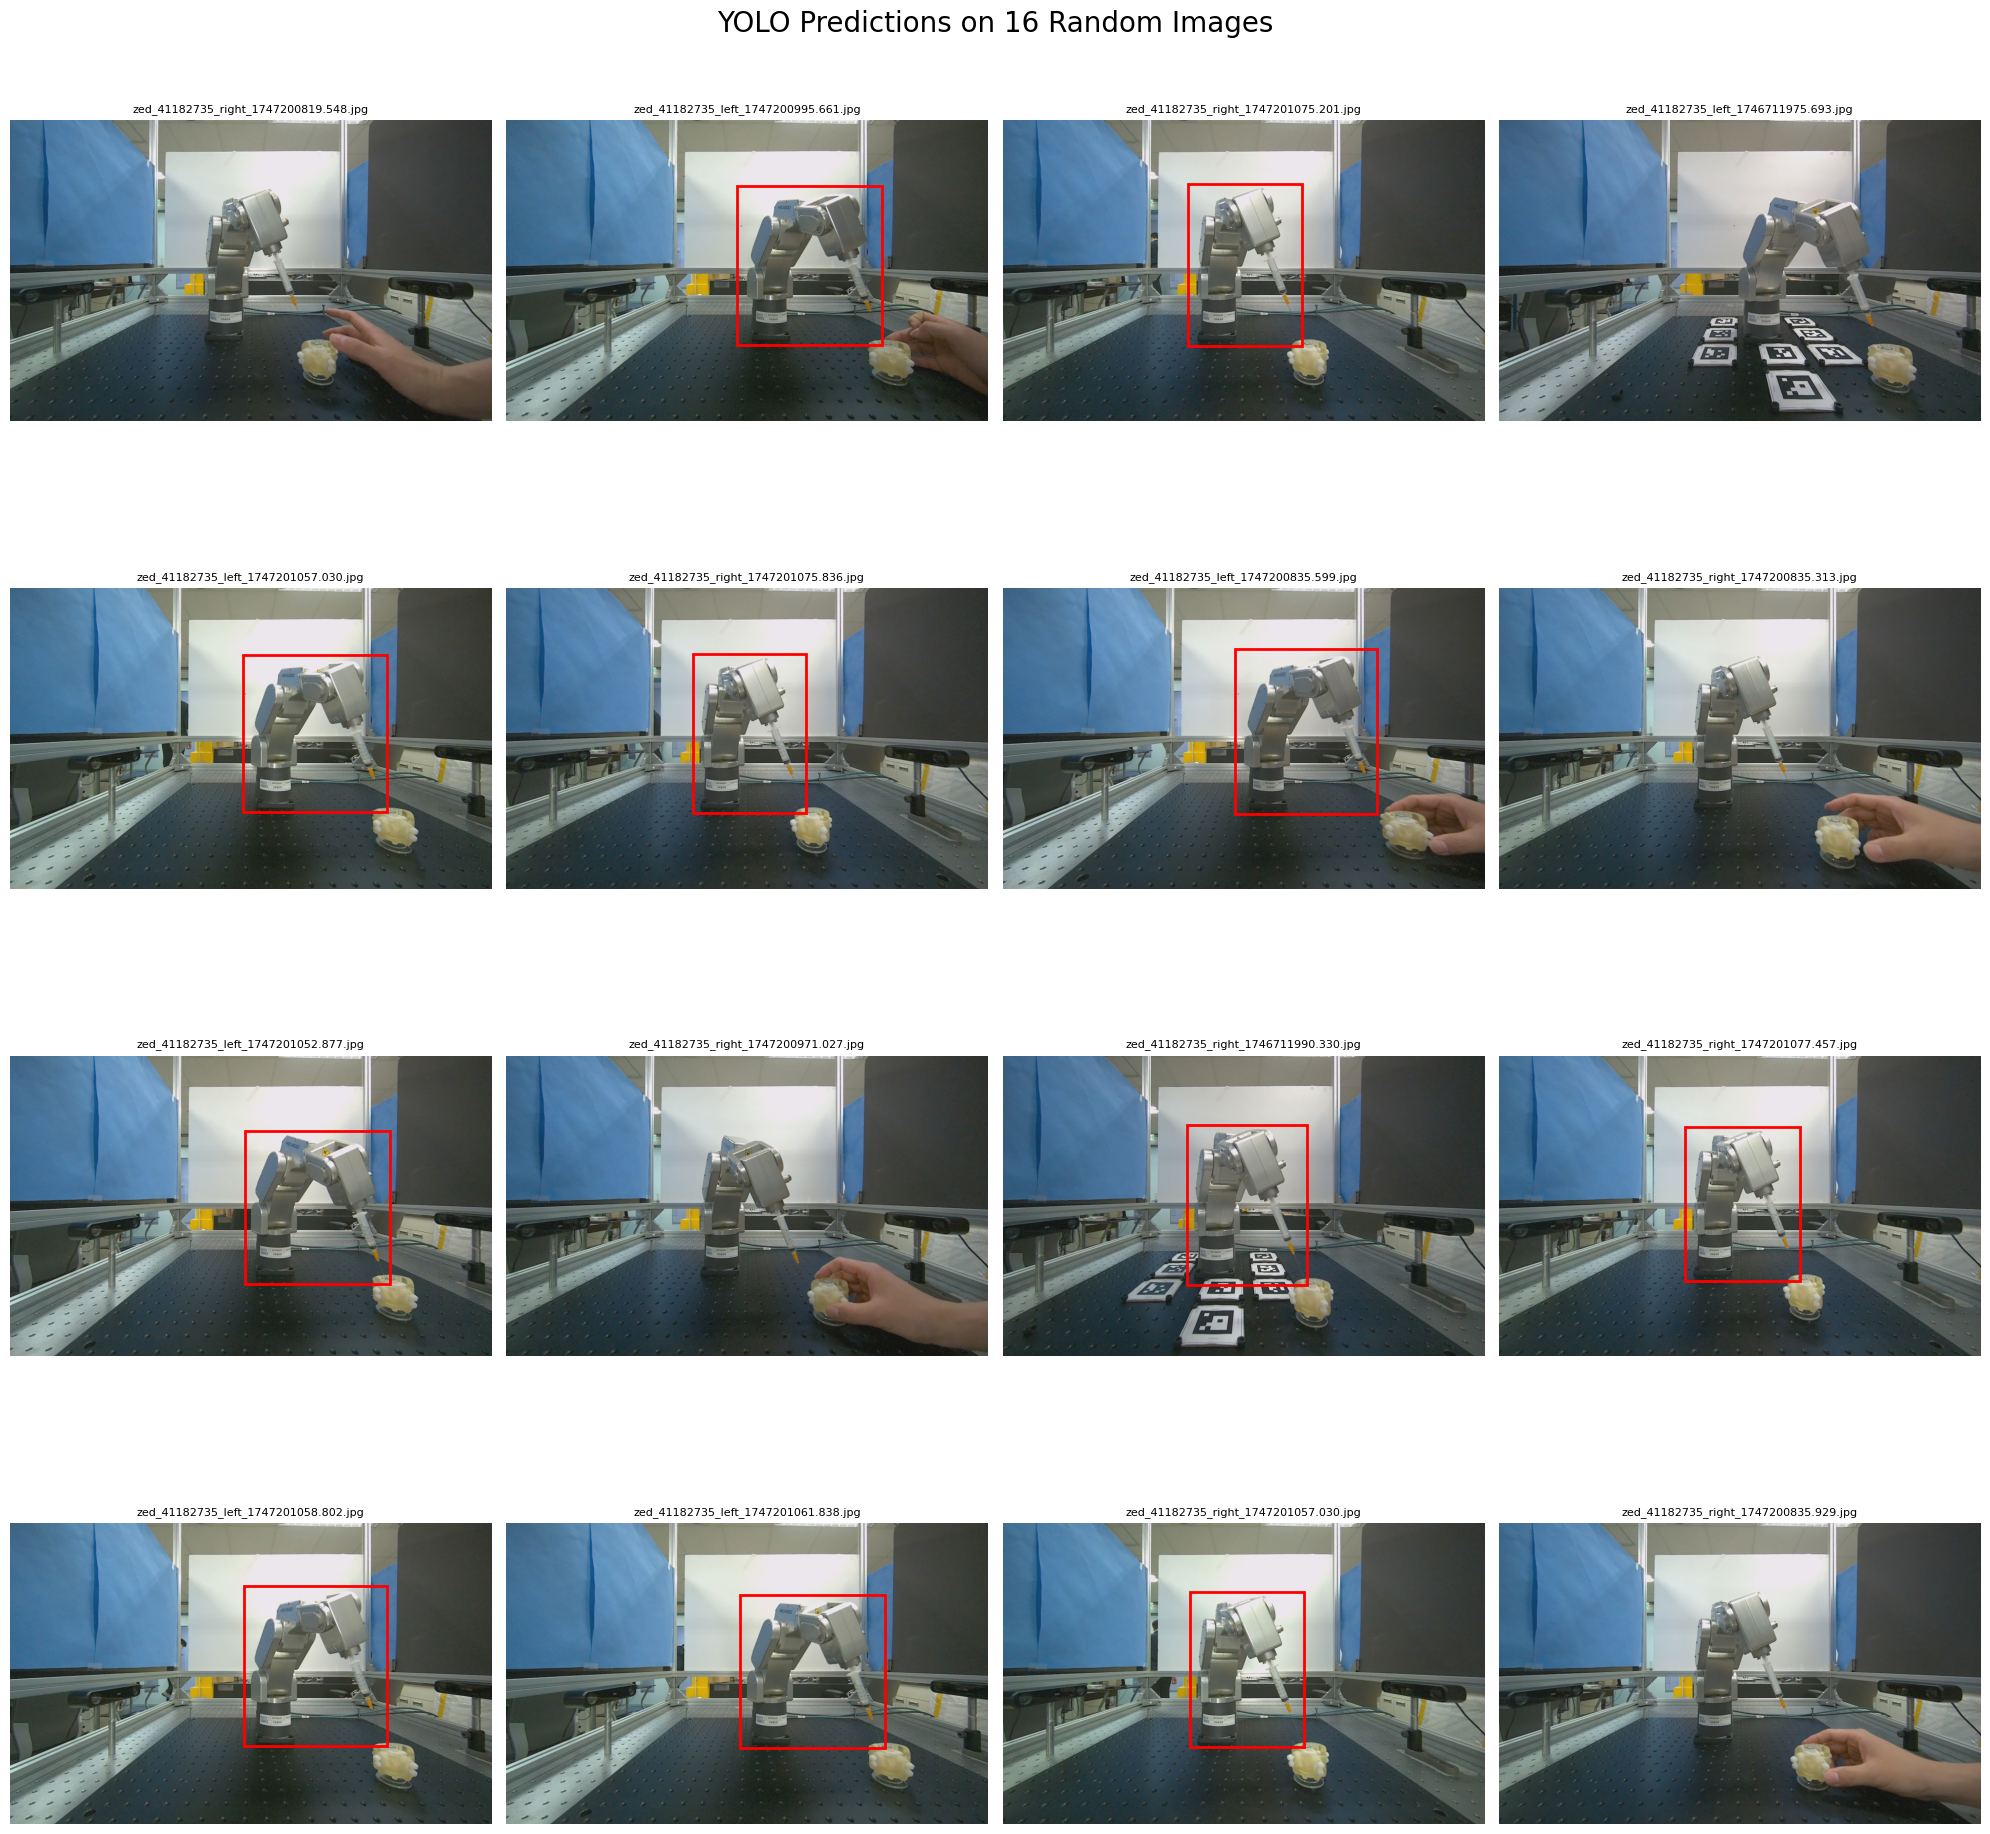

In [7]:
import os
import random
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from ultralytics import YOLO

# 모델 로딩
model = YOLO("/home/najo/NAS/Meca500_3D_Pose_Estimation/runs/detect/custom_yolov11X_full_train/weights/best.pt")

# 이미지 폴더 경로
image_folder = "/home/najo/NAS/Meca500_3D_Pose_Estimation/vla_dataset_insertion_250514_total/Front/images/train"
image_files = [f for f in os.listdir(image_folder) if f.endswith((".jpg", ".png"))]
sampled_files = random.sample(image_files, 16)

# 예측 및 시각화
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
fig.suptitle("YOLO Predictions on 16 Random Images", fontsize=20)

for i, filename in enumerate(sampled_files):
    image_path = os.path.join(image_folder, filename)
    
    # 예측 수행
    start_time = time.time()
    results = model.predict(source=image_path, save=False)
    end_time = time.time()
    print(f"{filename} - 실행 시간: {end_time - start_time:.4f}초")

    # 시각화
    img = Image.open(image_path)
    ax = axes[i // 4, i % 4]
    ax.imshow(img)
    ax.set_title(filename, fontsize=8)
    ax.axis('off')

    # 바운딩 박스 그리기
    boxes = results[0].boxes
    if boxes is not None and boxes.xyxy is not None:
        for box in boxes.xyxy.cpu().numpy():  # ← 여기서 GPU → CPU 변환
            x_min, y_min, x_max, y_max = box[:4]
            rect = patches.Rectangle(
                (x_min, y_min), x_max - x_min, y_max - y_min,
                linewidth=2, edgecolor='red', facecolor='none'
            )
            ax.add_patch(rect)

plt.tight_layout()
plt.subplots_adjust(top=0.99)
plt.show()


In [8]:
import os
from ultralytics import YOLO
from PIL import Image
from tqdm import tqdm

# 1. 모델 불러오기
model = YOLO("/home/najo/NAS/Meca500_3D_Pose_Estimation/runs/detect/custom_yolov11X_full_train/weights/best.pt")

# 2. 이미지 폴더 경로 지정
image_dir = "/home/najo/NAS/Meca500_3D_Pose_Estimation/vla_dataset_insertion_250514_total/Front/images/train"
image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.lower().endswith(('.jpg', '.jpeg', '.png'))]

# 3. 탐지 실패 이미지 저장 리스트
no_detection_images = []

# 4. 이미지별 추론 및 탐지 확인
for image_path in tqdm(image_paths, desc="Running inference"):
    results = model(image_path, verbose=False)[0]  # 첫 번째 결과만 사용

    if results.boxes is None or len(results.boxes) == 0:
        no_detection_images.append(os.path.basename(image_path))

# 5. 결과 출력
print(f"탐지 실패 이미지 수: {len(no_detection_images)}")
print("탐지 실패 이미지 목록:")
for name in no_detection_images:
    print("-", name)


Running inference: 100%|██████████| 726/726 [00:37<00:00, 19.38it/s]

탐지 실패 이미지 수: 289
탐지 실패 이미지 목록:
- zed_41182735_right_1746711975.693.jpg
- zed_41182735_right_1747200822.550.jpg
- zed_41182735_right_1747200840.572.jpg
- zed_41182735_right_1747200991.913.jpg
- zed_41182735_right_1747200827.802.jpg
- zed_41182735_right_1747200838.274.jpg
- zed_41182735_right_1746711974.861.jpg
- zed_41182735_right_1747200977.215.jpg
- zed_41182735_right_1746711996.088.jpg
- zed_41182735_right_1747200973.024.jpg
- zed_41182735_right_1746711994.739.jpg
- zed_41182735_right_1747200813.365.jpg
- zed_41182735_right_1747200828.121.jpg
- zed_41182735_right_1747200969.694.jpg
- zed_41182735_right_1746711982.684.jpg
- zed_41182735_right_1746711979.072.jpg
- zed_41182735_right_1746711978.763.jpg
- zed_41182735_right_1746711979.377.jpg
- zed_41182735_right_1747200980.319.jpg
- zed_41182735_right_1747200820.549.jpg
- zed_41182735_right_1747200991.172.jpg
- zed_41182735_right_1747200811.253.jpg
- zed_41182735_left_1746711983.006.jpg
- zed_41182735_right_1747200833.171.jpg
- zed_4118

In [ ]:
import os
from ultralytics import YOLO
from PIL import Image
from tqdm import tqdm

# 1. 모델 불러오기
model = YOLO("/home/najo/NAS/Meca500_3D_Pose_Estimation/runs/detect/custom_yolov11X/weights/last.pt")

# 2. 이미지 폴더 경로 및 라벨 저장 경로
image_dir = "/home/najo/NAS/Meca500_3D_Pose_Estimation/vla_dataset_insertion_250514_total/Front/images/train"
label_output_dir = image_dir.replace("images", "sudo_labels")  # 보통 라벨 경로는 images → labels
os.makedirs(label_output_dir, exist_ok=True)

image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.lower().endswith(('.jpg', '.jpeg', '.png'))]

# 3. 탐지 실패 이미지 저장 리스트
no_detection_images = []

# 4. 이미지별 추론 및 라벨 저장
for image_path in tqdm(image_paths, desc="Running inference"):
    results = model(image_path, verbose=False)[0]
    
    # 이미지 크기 얻기
    with Image.open(image_path) as img:
        w, h = img.size

    if results.boxes is None or len(results.boxes) == 0:
        no_detection_images.append(os.path.basename(image_path))
        continue

    # 라벨 저장 파일명
    label_filename = os.path.splitext(os.path.basename(image_path))[0] + ".txt"
    label_path = os.path.join(label_output_dir, label_filename)

    with open(label_path, "w") as f:
        for box in results.boxes:
            cls = int(box.cls.item())
            xywh = box.xywh[0]  # (x_center, y_center, w, h)
            x_c, y_c, bw, bh = xywh.tolist()
            # 정규화
            x_c /= w
            y_c /= h
            bw /= w
            bh /= h
            f.write(f"{cls} {x_c:.6f} {y_c:.6f} {bw:.6f} {bh:.6f}\n")

# 5. 탐지 실패 이미지 출력
print(f"탐지 실패 이미지 수: {len(no_detection_images)}")
print("탐지 실패 이미지 목록:")
for name in no_detection_images:
    print("-", name)


Running inference: 100%|██████████| 726/726 [00:37<00:00, 19.15it/s]

탐지 실패 이미지 수: 0
탐지 실패 이미지 목록:


In [1]:
import os
from tqdm import tqdm

# --- 1. 설정 ---

# 라벨 파일이 저장된 폴더 경로
LABEL_DIR = "/home/najo/NAS/Meca500_3D_Pose_Estimation/vla_dataset_insertion_250514_total/Front/sudo_labels/train"

# --- 2. 다중 박스 라벨 파일 검색 ---

if not os.path.exists(LABEL_DIR):
    print(f"오류: 라벨 폴더를 찾을 수 없습니다 - '{LABEL_DIR}'")
    # exit() 대신 return 또는 pass를 사용하거나 셀 실행을 중단하세요.
    # 이 셀에서는 print 후 아무것도 하지 않도록 구성합니다.
    files_to_delete = [] 
else:
    files_to_delete = []
    print(f"'{LABEL_DIR}' 폴더에서 바운딩 박스가 2개 이상인 라벨 파일을 검색합니다...")

    # 폴더 내 모든 파일을 순회
    all_files = os.listdir(LABEL_DIR)
    for filename in tqdm(all_files, desc="라벨 파일 확인 중"):
        if filename.endswith(".txt"):
            file_path = os.path.join(LABEL_DIR, filename)
            try:
                with open(file_path, 'r') as f:
                    # 파일의 모든 줄을 읽어 라인 수를 셈
                    lines = f.readlines()
                    if len(lines) > 1:
                        files_to_delete.append(filename)
            except Exception as e:
                print(f"파일 처리 중 오류 발생 '{filename}': {e}")

# --- 3. 결과 보고 및 자동 삭제 ---

if not files_to_delete:
    print("\n작업 완료: 바운딩 박스가 2개 이상인 라벨 파일이 없습니다.")
else:
    print(f"\n[정보] 총 {len(files_to_delete)}개의 파일에서 2개 이상의 바운딩 박스가 발견되었습니다.")
    print("아래 파일들을 자동으로 삭제합니다:")
    for name in files_to_delete:
        print(f" - {name}")
    
    print("\n---------------------------------")
    
    # 바로 삭제 진행
    deleted_count = 0
    for filename in tqdm(files_to_delete, desc="파일 삭제 중"):
        try:
            file_to_delete_path = os.path.join(LABEL_DIR, filename)
            os.remove(file_to_delete_path)
            deleted_count += 1
        except Exception as e:
            print(f"파일 삭제 오류 '{filename}': {e}")
            
    print(f"\n총 {deleted_count}개의 라벨 파일을 자동으로 삭제했습니다. ✅")

'/home/najo/NAS/Meca500_3D_Pose_Estimation/vla_dataset_insertion_250514_total/Front/sudo_labels/train' 폴더에서 바운딩 박스가 2개 이상인 라벨 파일을 검색합니다...


라벨 파일 확인 중: 100%|██████████| 726/726 [00:00<00:00, 54631.75it/s]



[정보] 총 33개의 파일에서 2개 이상의 바운딩 박스가 발견되었습니다.
아래 파일들을 자동으로 삭제합니다:
 - zed_41182735_left_1747200819.805.txt
 - zed_41182735_left_1747200823.627.txt
 - zed_41182735_left_1747200813.365.txt
 - zed_41182735_left_1747200821.246.txt
 - zed_41182735_left_1747200823.919.txt
 - zed_41182735_left_1747200815.337.txt
 - zed_41182735_left_1747200987.525.txt
 - zed_41182735_left_1746711998.935.txt
 - zed_41182735_right_1747200973.915.txt
 - zed_41182735_left_1747200823.273.txt
 - zed_41182735_left_1747200827.802.txt
 - zed_41182735_left_1747200998.835.txt
 - zed_41182735_left_1747200822.855.txt
 - zed_41182735_left_1747200813.976.txt
 - zed_41182735_left_1747200817.958.txt
 - zed_41182735_right_1747200979.076.txt
 - zed_41182735_left_1747200822.298.txt
 - zed_41182735_left_1747200814.906.txt
 - zed_41182735_left_1747200815.642.txt
 - zed_41182735_left_1746711998.655.txt
 - zed_41182735_left_1747200814.352.txt
 - zed_41182735_left_1747201061.838.txt
 - zed_41182735_left_1747200987.223.txt
 - zed_41182735_

파일 삭제 중: 100%|██████████| 33/33 [00:00<00:00, 20754.54it/s]


총 33개의 라벨 파일을 자동으로 삭제했습니다. ✅


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import os
import cv2
import numpy as np
from ultralytics import YOLO
from tqdm import tqdm

# --- 1. 설정 ---

# YOLO 모델 경로
YOLO_MODEL_PATH = "/home/najo/NAS/Meca500_3D_Pose_Estimation/runs/detect/custom_yolov11X2_front_100/weights/best.pt"

# 원본 이미지가 있는 폴더 경로
IMAGE_FOLDER = "/home/najo/NAS/Meca500_3D_Pose_Estimation/vla_dataset_insertion_250514_total/Front/images/train"

# 생성된 .txt 라벨을 저장할 폴더 경로
LABEL_OUTPUT_FOLDER = "/home/najo/NAS/Meca500_3D_Pose_Estimation/vla_dataset_insertion_250514_total/Front/labels_generated"

# 튜닝으로 찾은 HSV 값
LOWER_HSV = np.array([10, 0, 80])
UPPER_HSV = np.array([40, 40, 115])

# 라벨링할 클래스 인덱스 (로봇 1개이므로 0)
CLASS_INDEX = 0

# =========================================================
# ===            파일 이름에 따른 오프셋 설정             ===
# =========================================================
OFFSET_LEFT = { 'x_left': 240, 'x_right': 270, 'y_top': 200, 'y_bottom': 310 }
OFFSET_RIGHT = { 'x_left': 220, 'x_right': 270, 'y_top': 220, 'y_bottom': 330 }
# =========================================================

# --- 2. 라벨 생성 프로세스 ---

# 출력 폴더 생성
os.makedirs(LABEL_OUTPUT_FOLDER, exist_ok=True)
print(f"라벨 저장 폴더: '{LABEL_OUTPUT_FOLDER}'")

print("\nYOLO 모델을 로딩합니다...")
model = YOLO(YOLO_MODEL_PATH)
print("모델 로딩 완료.")

image_files = [f for f in os.listdir(IMAGE_FOLDER) if f.lower().endswith((".jpg", ".png", ".jpeg"))]

new_labels_created = 0

# tqdm을 사용하여 진행 상황 표시
for filename in tqdm(image_files, desc="이미지 처리 중"):
    image_path = os.path.join(IMAGE_FOLDER, filename)
    label_filename = os.path.splitext(filename)[0] + ".txt"
    label_path = os.path.join(LABEL_OUTPUT_FOLDER, label_filename)

    # 이미 라벨 파일이 존재하면 건너뛰기
    if os.path.exists(label_path):
        continue

    # YOLO 예측 수행
    yolo_results = model.predict(source=image_path, save=False, verbose=False)
    
    # YOLO가 탐지에 성공했다면 건너뛰기
    if len(yolo_results[0].boxes) > 0:
        continue
    
    # --- YOLO가 탐지 실패한 경우, HSV 기반 라벨링 시작 ---
    img_bgr = cv2.imread(image_path)
    if img_bgr is None:
        continue # 이미지를 읽지 못하면 건너뛰기

    hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, LOWER_HSV, UPPER_HSV)
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    valid_contours = [c for c in contours if cv2.contourArea(c) > 2000]

    if valid_contours:
        largest_contour = max(valid_contours, key=cv2.contourArea)

        if 'right' in filename.lower():
            offset = OFFSET_RIGHT
        else:
            offset = OFFSET_LEFT
            
        x_orig, y_orig, w_orig, h_orig = cv2.boundingRect(largest_contour)
        img_height, img_width, _ = img_bgr.shape

        x1_expanded = x_orig - offset['x_left']
        y1_expanded = y_orig - offset['y_top']
        x2_expanded = x_orig + w_orig + offset['x_right']
        y2_expanded = y_orig + h_orig + offset['y_bottom']

        x1_clipped = max(0, x1_expanded)
        y1_clipped = max(0, y1_expanded)
        x2_clipped = min(img_width, x2_expanded)
        y2_clipped = min(img_height, y2_expanded)

        final_x = x1_clipped
        final_y = y1_clipped
        final_w = x2_clipped - x1_clipped
        final_h = y2_clipped - y1_clipped

        # --- YOLO 라벨 형식으로 변환 ---
        x_center_norm = (final_x + final_w / 2) / img_width
        y_center_norm = (final_y + final_h / 2) / img_height
        width_norm = final_w / img_width
        height_norm = final_h / img_height

        # 라벨 문자열 생성
        yolo_label_line = f"{CLASS_INDEX} {x_center_norm:.6f} {y_center_norm:.6f} {width_norm:.6f} {height_norm:.6f}"
        
        # .txt 파일로 저장
        with open(label_path, 'w') as f:
            f.write(yolo_label_line)
        
        new_labels_created += 1

print(f"\n작업 완료! 총 {new_labels_created}개의 새로운 라벨 파일을 생성했습니다.")

# --- 1. 설정 ---

# 생성된 .txt 라벨이 저장된 폴더 경로
LABEL_FOLDER = "/home/najo/NAS/Meca500_3D_Pose_Estimation/vla_dataset_insertion_250514_total/Front/labels_generated"

# 아웃라이어 판단 기준 (표준편차의 배수)
# 값이 클수록 더 많이 벗어난 값만 아웃라이어로 판단합니다. (보통 2.0 ~ 3.0 사용)
STDEV_THRESHOLD = 2.0

# --- 2. 모든 라벨 파일 읽기 및 데이터 수집 ---

label_data = []
if not os.path.exists(LABEL_FOLDER):
    print(f"오류: 라벨 폴더를 찾을 수 없습니다 - '{LABEL_FOLDER}'")
    exit()

all_files = os.listdir(LABEL_FOLDER)
for filename in tqdm(all_files, desc="라벨 파일 읽는 중"):
    if filename.endswith(".txt"):
        label_path = os.path.join(LABEL_FOLDER, filename)
        try:
            with open(label_path, 'r') as f:
                line = f.readline().strip().split()
                if len(line) == 5:
                    _, _, _, w, h = map(float, line)
                    area = w * h
                    label_data.append({'filename': filename, 'width': w, 'height': h, 'area': area})
        except Exception as e:
            print(f"파일 읽기 오류 '{filename}': {e}")

if not label_data:
    print("분석할 라벨 데이터가 없습니다.")
    exit()

# Pandas DataFrame으로 변환하여 분석 용이하게 함
df = pd.DataFrame(label_data)

# --- 3. 통계 분석 및 시각화 ---

# 면적(area)에 대한 통계 계산
mean_area = df['area'].mean()
std_area = df['area'].std()

print("\n--- 바운딩 박스 면적 통계 ---")
print(f"총 라벨 개수: {len(df)}")
print(f"평균 면적: {mean_area:.6f}")
print(f"면적 표준편차: {std_area:.6f}")
print("---------------------------------")

# 면적 분포 시각화
plt.figure(figsize=(12, 5))
sns.histplot(df['area'], kde=True, bins=50)
plt.title('Bounding Box Area Distribution')
plt.xlabel('Normalized Area (width * height)')
plt.ylabel('Frequency')
# 평균과 아웃라이어 경계선 표시
plt.axvline(mean_area, color='red', linestyle='--', label=f'Mean: {mean_area:.4f}')
lower_bound_line = mean_area - STDEV_THRESHOLD * std_area
upper_bound_line = mean_area + STDEV_THRESHOLD * std_area
plt.axvline(lower_bound_line, color='orange', linestyle=':', label=f'Lower Bound (-{STDEV_THRESHOLD}σ)')
plt.axvline(upper_bound_line, color='orange', linestyle=':', label=f'Upper Bound (+{STDEV_THRESHOLD}σ)')
plt.legend()
plt.show()


# --- 4. 아웃라이어 식별 ---

# 아웃라이어 경계값 계산
lower_bound = mean_area - STDEV_THRESHOLD * std_area
upper_bound = mean_area + STDEV_THRESHOLD * std_area

# 아웃라이어에 해당하는 데이터 필터링
outliers_df = df[(df['area'] < lower_bound) | (df['area'] > upper_bound)]

if outliers_df.empty:
    print("\n분석 결과: 제거할 만한 아웃라이어가 없습니다.")
else:
    print(f"\n[경고] 총 {len(outliers_df)}개의 아웃라이어를 찾았습니다 (기준: {STDEV_THRESHOLD}σ).")
    print("아래는 제거 대상 파일 목록입니다:")
    # 보기 좋게 정렬해서 출력
    for index, row in outliers_df.sort_values(by='area').iterrows():
        print(f" - 파일: {row['filename']}, 면적: {row['area']:.6f}")

    # --- 5. 사용자 확인 및 파일 삭제 ---
    print("\n---------------------------------")
    user_input = input("위에 목록으로 나온 .txt 파일들을 삭제하시겠습니까? (y/n): ").lower()
    
    if user_input == 'y':
        deleted_count = 0
        for filename in tqdm(outliers_df['filename'], desc="아웃라이어 파일 삭제 중"):
            try:
                file_to_delete = os.path.join(LABEL_FOLDER, filename)
                os.remove(file_to_delete)
                deleted_count += 1
            except Exception as e:
                print(f"파일 삭제 오류 '{filename}': {e}")
        print(f"\n총 {deleted_count}개의 아웃라이어 라벨 파일을 삭제했습니다.")
    else:
        print("\n삭제 작업을 취소했습니다.") 